# Non-Linear Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

## The Iris dataset

X: (150, 2); y: (150,)


<ipython-input-7-31886733a30a>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


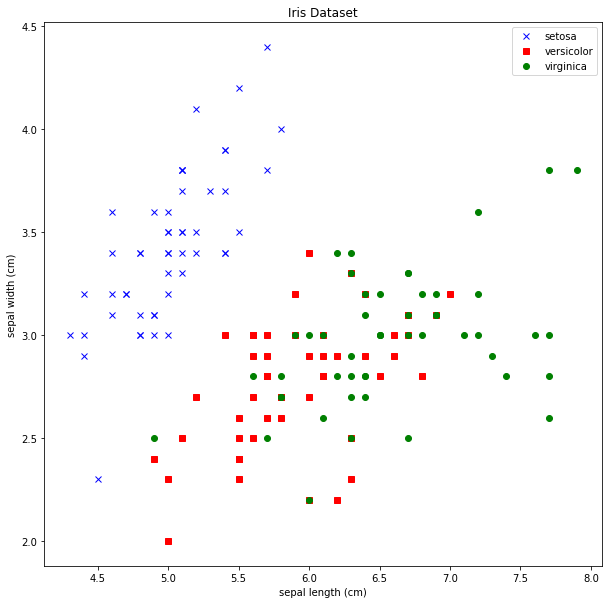

In [7]:
# Load the iris data.

iris = datasets.load_iris()
X = iris.data[:, :2] # Only take the first two features for visualization purposes.
y = iris.target
feat_names = iris.feature_names[:2]
targ_names = iris.target_names

print(f'X: {X.shape}; y: {y.shape}')

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X[y == 0, 0], X[y == 0, 1], 'b x', label=targ_names[0])
ax.plot(X[y == 1, 0], X[y == 1, 1], 'r s', label=targ_names[1])
ax.plot(X[y == 2, 0], X[y == 2, 1], 'g o', label=targ_names[2])
ax.set_title('Iris Dataset')
ax.set_xlabel(feat_names[0])
ax.set_ylabel(feat_names[1])
ax.legend()
fig.show()

### Train/Test Split

As a proxy to judge generalization on unseen inputs, we split our data into a training set and a test set. `scikit-learn` provides a simple API for this as well.

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

## $k$-Nearest Neighbors

An example of a nonlinear classifier is the $k$-nearest neighbors algorithm.

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print('kNN accuracy = {:0.4f}'.format(knn.score(X_test, y_test)))

kNN accuracy = 0.8684


### How do the decision boundaries vary with $k$?

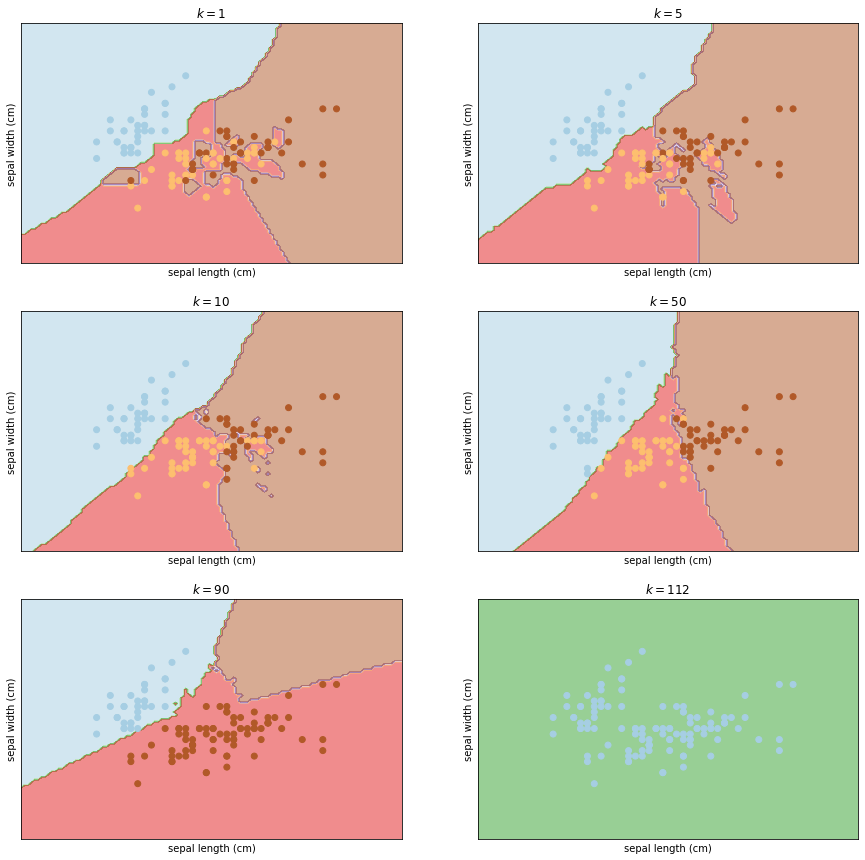

In [10]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=2, sharex=True, sharey=True)

## Generate a mesh of test inputs
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                     np.arange(y_min, y_max, .05))

## Prepare test set using test values
X_mesh = np.c_[xx.ravel(), yy.ravel()]

k_values = [1, 5, 10, 50, 90, X_train.shape[0]]
for i in range(3):
    for j in range(2):
        k = k_values[i * 2 + j]
        
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_mesh_pred = knn.predict(X_mesh)
        axes[i,j].contourf(xx, yy, y_mesh_pred.reshape(*xx.shape),
                           cmap=plt.cm.Paired, alpha=0.5)
        axes[i,j].scatter(X_train[:, 0], X_train[:, 1], c=knn.predict(X_train),
                          cmap=plt.cm.Paired, alpha=1.0)

        axes[i,j].set_title(rf'$k = {k}$')
        axes[i,j].set_xlabel('sepal length (cm)')
        axes[i,j].set_ylabel('sepal width (cm)')
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

Notice that choosing a larger value of $k$ gives smoother decision boundaries, since we are averging over more points. Taking this argument to the extreme, if we took $k$ to be the size of the training set, then the classifier would just always output the class with the most instances, i.e. a constant classifier.

**NOTE**: Choosing a large $k$ corresponds to _lower variance_ but _higher bias_ in our model.

## A probabilistic interpretation

We are interested in finding the posterior probability of class $\mathcal{C}_i$ given input $x$, i.e. $p(\mathcal{C}_i\mid x)$. Through the Bayes rule, we write this posterior as

$$
p(\mathcal{C}_i\mid x) = \frac{p(x\mid\mathcal{C}_i)p(\mathcal{C}_i)}{p(x)}
$$

First, the prior class probabilities $p(\mathcal{C}_i)$ can be computed as the ratio of total number of training samples belonging to the corresponding class, $n_i$, to the total number of training samples $n$, i.e.

$$
p(\mathcal{C}_i) = \frac{n_i}{n}
$$

For a $k$-nearest neighbors algorithm, imagine expanding a sphere around the data point $x$. The total probability of $k$ points falling inside this sphere is given by,

$$
p(x) \propto \frac{k}{n}
$$

Similarly, the conditional density is given by,

$$
p(x \mid \mathcal{C}_i) \propto \frac{k_i}{n_i}
$$

The proportionality constant in both these distributions is approximated by the volume of the (hyper)sphere we define around the point $x$. We don't necessarily need it for the posterior calculations, since it gets cancelled through the Bayes rule. The posterior probability is then given by a simple ratio

$$
p(\mathcal{C}_i\mid x) = \frac{k_i}{k}
$$

The optimal decision rule then is to pick the the class with the highest posterior probability. This is equivalent to a majority-voting scheme among the $k$-nearest neighbors to pick the class assignment.

**NOTE**: Such methods that depend directly on the data, and make few assumptions about the nature of the probability distributions are known as _non-parametric_ methods.